In [2]:
# Importing libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('Datasets/HIPPA-Dataset.csv')
dataset

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Type of Breach,Location of Breached Information,Business Associate Present
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,Theft,Paper/Films,No
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,Theft,Network Server,No
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,Theft,"Other, Other Portable Electronic Device",No
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,Loss,Laptop,No
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,Theft,Desktop Computer,No
...,...,...,...,...,...,...,...
1716,"Amy E. Carter, MD d/b/a Cove Family and Sports...",AL,Healthcare Provider,4300.0,Hacking/IT Incident,Network Server,No
1717,"Krichev Family Medicine, P.C.",AL,Healthcare Provider,4300.0,Hacking/IT Incident,Network Server,No
1718,Texas Health and Human Services,TX,Health Plan,1842.0,Improper Disposal,Paper/Films,No
1719,Baptist Medical Center South,FL,Healthcare Provider,531.0,Loss,Other Portable Electronic Device,No


In [3]:
# Defines how many rows and how many columns this dataset has
dataset.shape

(1721, 7)

In [4]:
# Returns the number of unique elements in the object
dataset.nunique()

Name of Covered Entity              1563
State                                 52
Covered Entity Type                    4
Individuals Affected                1190
Type of Breach                        28
Location of Breached Information      63
Business Associate Present             2
dtype: int64

In [5]:
# Dropping nan elements from state column
dataset.dropna(subset = ['State'], inplace = True)
dataset.isnull().sum()

Name of Covered Entity               0
State                                0
Covered Entity Type                 71
Individuals Affected                60
Type of Breach                      46
Location of Breached Information    43
Business Associate Present           0
dtype: int64

In [6]:
# Dropping nan elements from 'Covered Entity Type' Column
dataset.dropna(subset=['Covered Entity Type'], inplace = True)
dataset.isnull().sum()

Name of Covered Entity               0
State                                0
Covered Entity Type                  0
Individuals Affected                17
Type of Breach                       3
Location of Breached Information     0
Business Associate Present           0
dtype: int64

In [7]:
# Dropping nan elements from 'Individuals Affected' Column
dataset.dropna(subset=['Individuals Affected'], inplace = True)
dataset.isnull().sum()

Name of Covered Entity              0
State                               0
Covered Entity Type                 0
Individuals Affected                0
Type of Breach                      3
Location of Breached Information    0
Business Associate Present          0
dtype: int64

In [8]:
# Dropping nan elements from 'Type of Breach' Column
dataset.dropna(subset=['Type of Breach'], inplace = True)
dataset.isnull().sum()

Name of Covered Entity              0
State                               0
Covered Entity Type                 0
Individuals Affected                0
Type of Breach                      0
Location of Breached Information    0
Business Associate Present          0
dtype: int64

In [9]:
# Returns a list with the data types of each column
dataset.dtypes

Name of Covered Entity               object
State                                object
Covered Entity Type                  object
Individuals Affected                float64
Type of Breach                       object
Location of Breached Information     object
Business Associate Present           object
dtype: object

In [10]:
# Returns unbaised skew over requested axis 
dataset.skew()

Individuals Affected    37.35227
dtype: float64

In [11]:
# Generates descriptive statistics for data frame
dataset.describe()

,Individuals Affected
count,1.618000e+03
mean,9.728358e+04
std,2.010431e+06
min,5.000000e+02
25%,9.602500e+02
50%,2.201500e+03
75%,7.012000e+03
max,7.880000e+07


In [12]:
# Separating categorical and continous features
cat=[i for i in dataset.columns if dataset[i].nunique()<10 ]
cont=[i for i in dataset.columns if dataset[i].nunique()>10 and i!='Name of Covered Entity']

No     1346
Yes     272
Name: Business Associate Present, dtype: int64

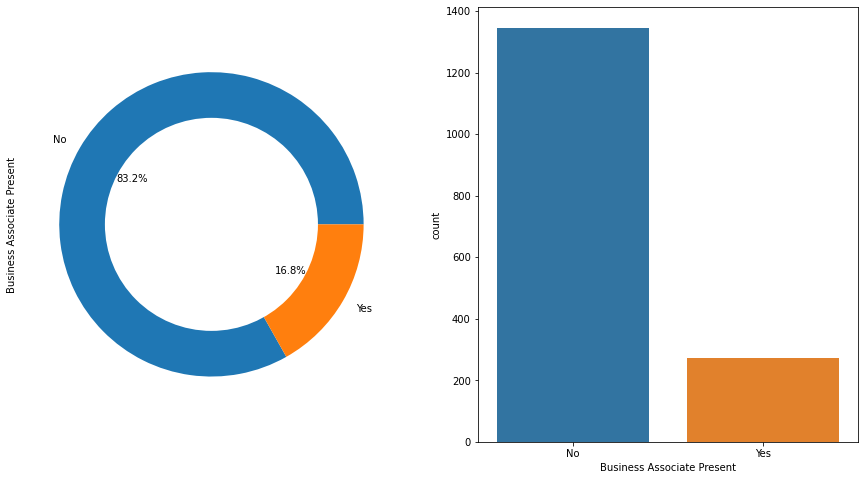

In [13]:
# Diagram Analysis for 'Business Associate Present' Column
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
dataset['Business Associate Present'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Business Associate Present',data=dataset)
dataset['Business Associate Present'].value_counts()

Theft                                                         705
Unauthorized Access/Disclosure                                370
Hacking/IT Incident                                           194
Loss                                                          125
Other                                                          77
Improper Disposal                                              55
Theft, Unauthorized Access/Disclosure                          24
Loss, Theft                                                    14
Unknown                                                         9
Hacking/IT Incident, Unauthorized Access/Disclosure             8
Other, Unauthorized Access/Disclosure                           7
Other, Theft                                                    3
Improper Disposal, Loss, Theft                                  3
Improper Disposal, Loss                                         3
Loss, Unauthorized Access/Disclosure                            3
Hacking/IT

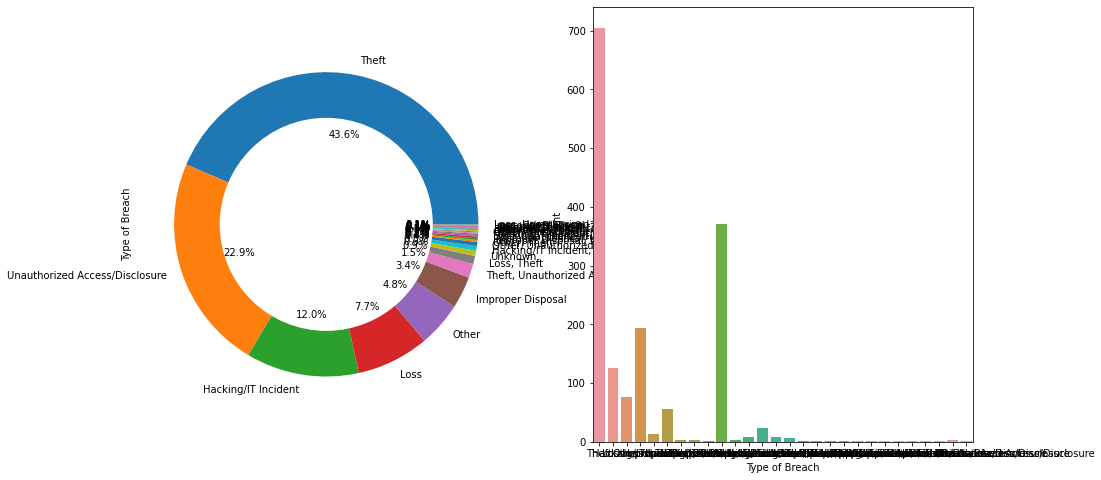

In [14]:
# Diagram Analysis for 'Type of Breach' Column
# Should I rename the elements of the column to make it easier to be read?
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
dataset['Type of Breach'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Type of Breach',data=dataset)
dataset['Type of Breach'].value_counts()

CA    191
TX    138
FL    117
NY     92
IL     84
PA     61
OH     55
IN     51
GA     50
MA     44
NC     43
TN     42
WA     42
MN     41
AZ     37
KY     36
MI     36
MD     30
VA     29
MO     28
CO     27
AL     27
OR     26
SC     23
PR     23
CT     21
NJ     20
AR     18
OK     15
WI     14
NM     14
LA     13
KS     11
NV     11
UT     10
MT     10
RI     10
DC     10
NE      9
MS      9
IA      9
WV      7
AK      6
WY      5
NH      4
SD      4
ND      3
ID      3
HI      3
VT      2
ME      2
DE      2
Name: State, dtype: int64

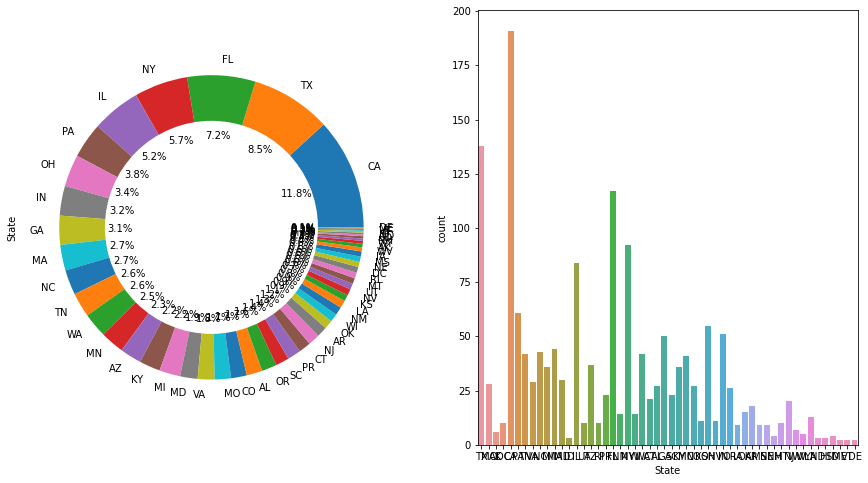

In [16]:
# Diagram Analysis for State Column
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
dataset['State'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='State',data=dataset)
dataset['State'].value_counts()

Healthcare Provider          1146
Business Associate            269
Health Plan                   199
Healthcare Clearing House       4
Name: Covered Entity Type, dtype: int64

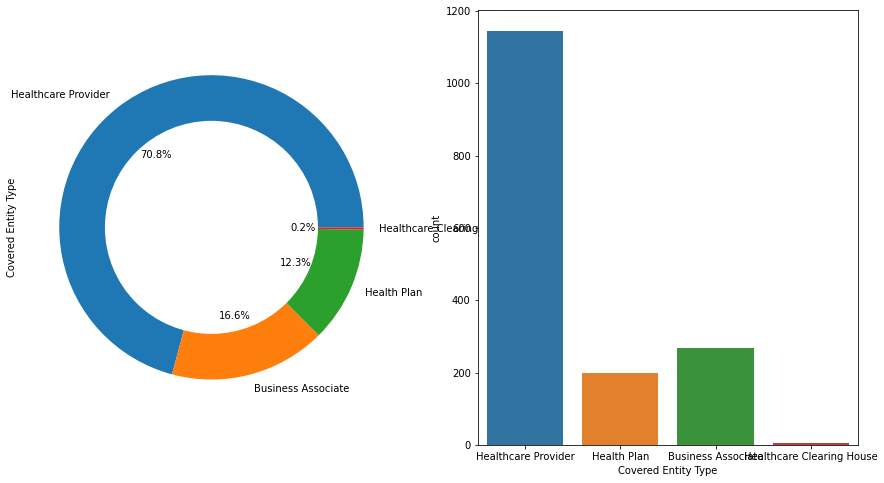

In [17]:
# Diagram Analysis for 'Covered Entity Type' column
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
dataset['Covered Entity Type'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Covered Entity Type',data=dataset)
dataset['Covered Entity Type'].value_counts()

Paper/Films                                                          389
Laptop                                                               271
Network Server                                                       200
Other                                                                154
Desktop Computer                                                     125
                                                                    ... 
Desktop Computer, Laptop, Other, Other Portable Electronic Device      1
Laptop, Other Portable Electronic Device, Paper/Films                  1
Email, Network Server, Other Portable Electronic Device                1
Email, Laptop                                                          1
Desktop Computer, Other, Other Portable Electronic Device              1
Name: Location of Breached Information, Length: 62, dtype: int64

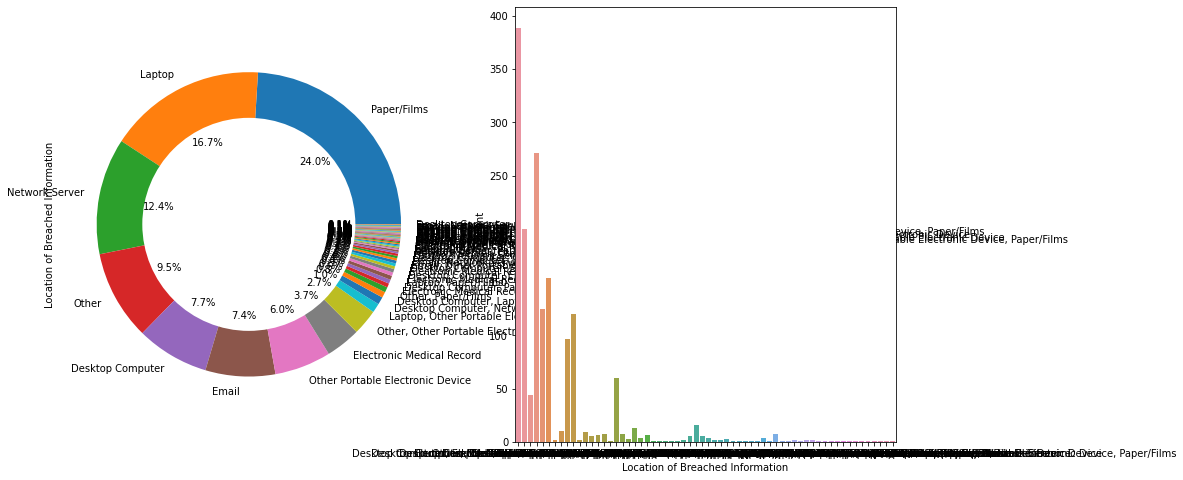

In [18]:
# Diagram Analysis for 'Location of Breached Information' column
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
dataset['Location of Breached Information'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Location of Breached Information',data=dataset)
dataset['Location of Breached Information'].value_counts()

In [21]:
# Column Analysis for 'Name of Covered Entity'
dataset['Name of Covered Entity'].value_counts()

Walgreen Co.                                                       8
StayWell Health Management, LLC                                    6
UnitedHealth Group health plan single affiliated covered entity    4
Mount Sinai Medical Center                                         4
Clearpoint Design, Inc.                                            4
                                                                  ..
HomeCare of Mid-Missouri, Inc.                                     1
Henry County Health Department                                     1
Diversified Resources, Inc.                                        1
Laboratory Corporation of America/Dynacare Northwest, Inc.         1
Cedars-Sinai Health System                                         1
Name: Name of Covered Entity, Length: 1480, dtype: int64